In [94]:
#!pip install ucimlrepo --quiet

In [95]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# fetch dataset
census_income = fetch_ucirepo(id=20)
census_income['data'].keys()

# data (as pandas dataframes)
data = census_income.data.original
df = pd.DataFrame(data)
df.shape

(48842, 15)

In [97]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [98]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Tratamento dos Dados

#### Tratamento da Class

In [100]:
df.income.unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [101]:
#Avaliando o Tamanho da Class
#df[df['income'] == '<=50K.'].shape
df[df['income'] == '>50K.'].shape

(3846, 15)

In [102]:
#Tratando a Class
df.income = df.income.replace('>50K', '1').replace('<=50K', '0').replace('<=50K.', '0').replace('>50K.', '1').astype(int)

In [103]:
#Classe mediamente desbalanceada 23,92% do conjuto total do Target
df.income.value_counts()

income
0    37155
1    11687
Name: count, dtype: int64

#### Tratamento de dados,  NULL e Outliers

In [104]:
#Tratando a Feacture Sex e dx ela binaria.
df.sex.value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [105]:
df.sex = df.income.replace('Male', '1').replace('Female', '0').astype(int)
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [106]:
#Analisando Dados Nulos
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [107]:
#Identificado Dados "invalidos" nas 2 feactues, ambos estão relacionado. Ja que "Ocupação" e "CLasse de trabalho" tem uma senta similaridade.
print(df.occupation.value_counts(),"\n\n",
df.workclass.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64 

 workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [108]:
#Dropando Dados o "?"
df.drop(df[df['workclass'] == '?'].index,inplace=True)
df.drop(df[df['occupation'] == '?'].index,inplace=True)

#Print
print(df.occupation.value_counts(),"\n\n",
df.workclass.value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64 

 workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked            3
Name: count, dtype: int64


In [109]:
#Analisando os Dados Null e tbm checando quanto que isso afeta a nossa Class.
df[df['workclass'].isnull()]
df[df['workclass'].isnull()]['income'].value_counts()

income
0    889
1     74
Name: count, dtype: int64

In [110]:
# Os dados Nulos de cada coluna com ocorrencia de nulas corresponde a menos de 2% do Dataset, vou exclui-lo, ainda mais pq as variáveis são categoricas.
df = df.dropna(subset=['workclass', 'occupation', 'native-country'])
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [111]:
df.describe().columns

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')

<Axes: >

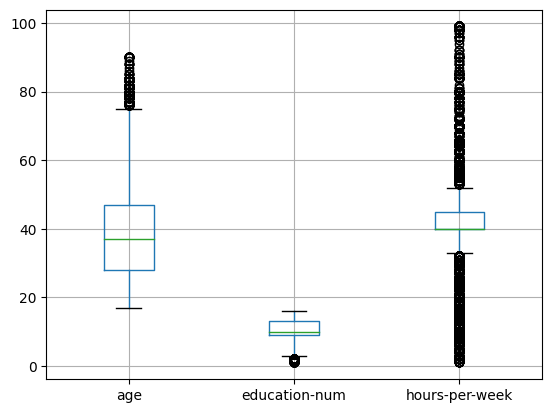

In [112]:
#Analisando Outliers
df.boxplot(column= ['age', 'education-num','hours-per-week'])

<Axes: xlabel='age', ylabel='Count'>

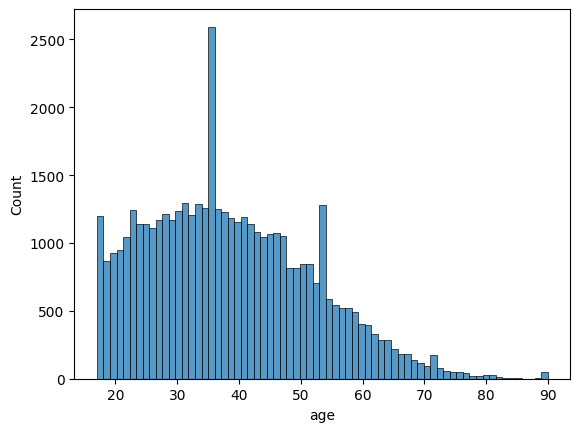

In [113]:
#Analisando Outliers
sns.histplot(data=df, x = df['age'])

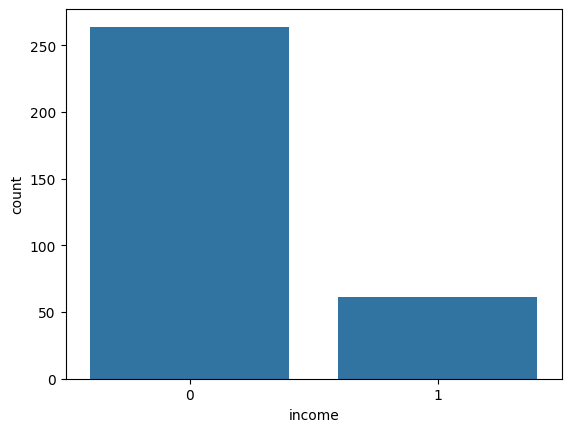

In [114]:
#Removendo Outliers  e analisando o quanto isso pesa na Class
sns.barplot(df[df['age'] >= 75]['income'].value_counts())
semi_tratado = df[df['age'] < 75]


income
0    716
1     33
Name: count, dtype: int64

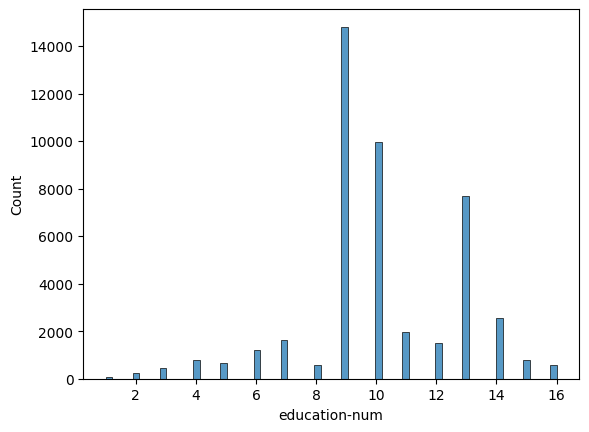

In [115]:
#Analisando Outliers  e analisando o quanto isso pesa na Class
sns.histplot(data=semi_tratado, x = semi_tratado['education-num'])
semi_tratado[semi_tratado['education-num'] <= 3]['income'].value_counts()


In [116]:
#Removendo Outliers  e analisando o quanto isso pesa na Class
semi_tratado = semi_tratado[semi_tratado['education-num'] > 3]
semi_tratado.shape

(44704, 15)

income
1    345
0      7
Name: count, dtype: int64

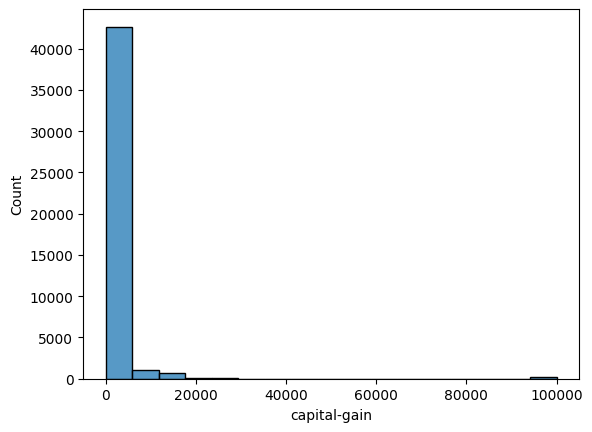

In [117]:
#Analisando Outliers  e analisando o quanto isso pesa na Class
sns.histplot(data=semi_tratado, x = semi_tratado['capital-gain'])
semi_tratado[semi_tratado['capital-gain'] > 19000]['income'].value_counts()

In [118]:
semi_tratado = semi_tratado[semi_tratado['capital-gain'] < 19000]
semi_tratado.shape

(44352, 15)

In [119]:
semi_tratado.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [120]:
#PODEMOS VER QUE DEPOIS DE UMA TRATAMENTE MEDIO NOSSA CLASS AGORA ESTÁ COM 32,62% DOS DADOS.
semi_tratado.income.value_counts()

income
0    33441
1    10911
Name: count, dtype: int64

In [121]:
semi_tratado.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

### Mudança de Dimensionalidade e Padronização dos Dados

In [122]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [123]:
semi_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44352 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             44352 non-null  int64 
 1   workclass       44352 non-null  object
 2   fnlwgt          44352 non-null  int64 
 3   education       44352 non-null  object
 4   education-num   44352 non-null  int64 
 5   marital-status  44352 non-null  object
 6   occupation      44352 non-null  object
 7   relationship    44352 non-null  object
 8   race            44352 non-null  object
 9   sex             44352 non-null  int64 
 10  capital-gain    44352 non-null  int64 
 11  capital-loss    44352 non-null  int64 
 12  hours-per-week  44352 non-null  int64 
 13  native-country  44352 non-null  object
 14  income          44352 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 5.4+ MB


In [124]:
#Usando a mudança de dimensionalidade para Modificar as variaveis Categoricas
dummies_completo = pd.get_dummies(semi_tratado, drop_first=True, dtype=int)
dummies_completo.shape

(44352, 95)

In [125]:
dummies_completo.head(8)

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,0,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,49,160187,5,0,0,0,16,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,1,0,0,45,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [126]:
dummies_completo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44352 entries, 0 to 48841
Data columns (total 95 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        44352 non-null  int64
 1   fnlwgt                                     44352 non-null  int64
 2   education-num                              44352 non-null  int64
 3   sex                                        44352 non-null  int64
 4   capital-gain                               44352 non-null  int64
 5   capital-loss                               44352 non-null  int64
 6   hours-per-week                             44352 non-null  int64
 7   income                                     44352 non-null  int64
 8   workclass_Local-gov                        44352 non-null  int64
 9   workclass_Private                          44352 non-null  int64
 10  workclass_Self-emp-inc                     44352 no

In [127]:
#selecionando as colunas 'Numericas' para escalonar os dados usando o Standard.

scaler = StandardScaler()

colunas_scala = dummies_completo[['age', 'fnlwgt', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']]
escala = scaler.fit_transform(colunas_scala)
dummies_completo[['age', 'fnlwgt', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']] = escala


In [128]:
#Conjuto de dados pronto pra treinamento.
dummies_completo.head(5)

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.070503,-1.060558,1.170936,0,0.740025,-0.220696,-0.084318,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.936110,-1.005553,1.170936,0,-0.240979,-0.220696,-2.349860,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.008188,0.250546,-0.524363,0,-0.240979,-0.220696,-0.084318,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1.172185,0.431602,-1.372012,0,-0.240979,-0.220696,-0.084318,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.795104,1.415789,1.170936,0,-0.240979,-0.220696,-0.084318,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Treinamento

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, roc_curve, auc, precision_recall_curve,classification_report

In [130]:
# Separar features e Classe para treinamento e teste
X = dummies_completo.drop('income', axis=1)
y = dummies_completo['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Acuracia do KNN: 97.2418457838569
Recall do KNN: 92.5477128142987


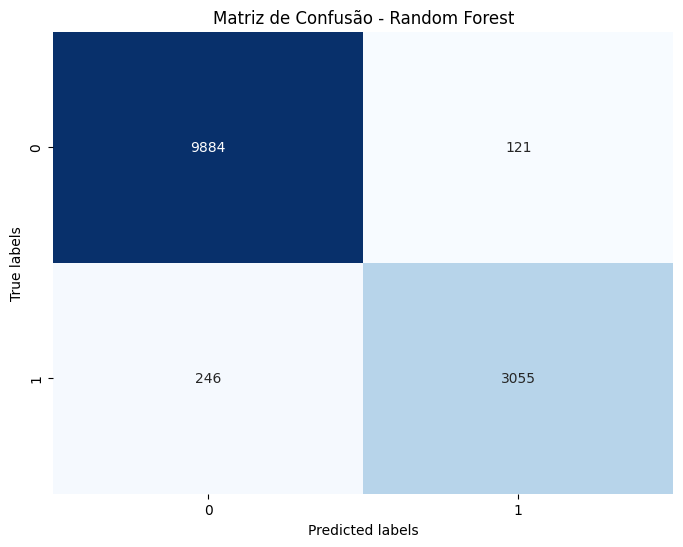

In [131]:
# Treinar e avaliar o modelo KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

#Printando a Acuracia e o Recall
knn_accuracy = accuracy_score(y_test, knn_pred)
print("Acuracia do KNN:", knn_accuracy*100)
knn_recall = recall_score(y_test, knn_pred)
print("Recall do KNN:", knn_recall*100)

knn_cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

Acuracia do Random Forest : 1.0
Recall do Random Forest: 1.0


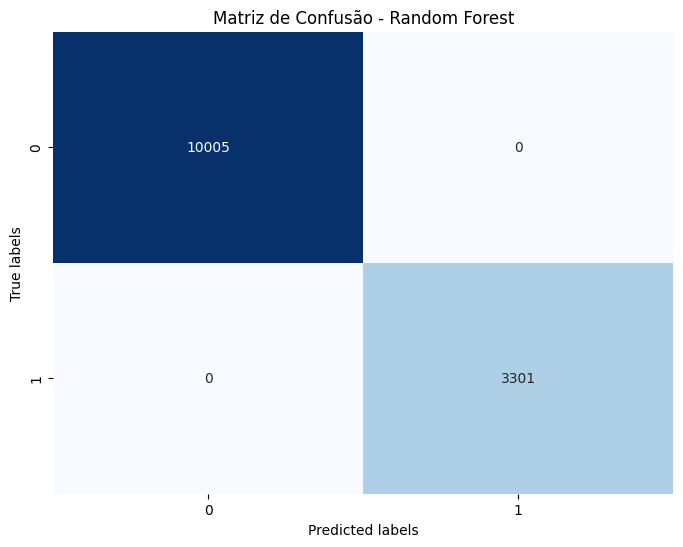

In [132]:
# Treinar e avaliar o modelo Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

#Printando a Acuracia e o Recall para o random
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Acuracia do Random Forest :", rf_accuracy)
rf_recall = recall_score(y_test, rf_pred)
print("Recall do Random Forest:", rf_recall)

rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [133]:
#Usando Classification Reports
print("Relatório  KNN:")
print(classification_report(y_test, knn_pred))

print("Relatório Random Forest:")
print(classification_report(y_test, rf_pred))


Relatório  KNN:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     10005
           1       0.96      0.93      0.94      3301

    accuracy                           0.97     13306
   macro avg       0.97      0.96      0.96     13306
weighted avg       0.97      0.97      0.97     13306

Relatório Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10005
           1       1.00      1.00      1.00      3301

    accuracy                           1.00     13306
   macro avg       1.00      1.00      1.00     13306
weighted avg       1.00      1.00      1.00     13306



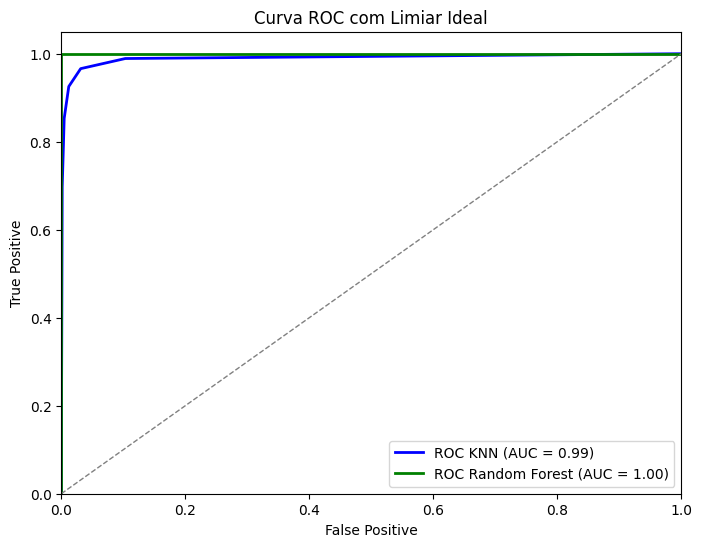

In [134]:
# Prever probabilidades de classe para o KNN
knn_probs = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Prever probabilidades de classe para o Random Forest
rf_probs = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotar as curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='ROC KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Curva ROC com Limiar Ideal')
plt.legend(loc='lower right')
plt.show()

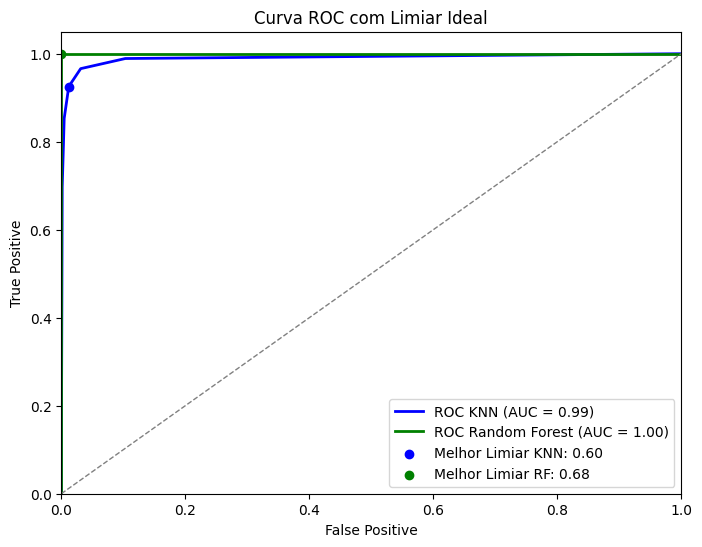

In [135]:
# Calcular a precisão e revocação para o KNN
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, knn_probs)

# Calcular a precisão e revocação para o Random Forest
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf_probs)

# Encontrar o limiar ideal para o KNN (por exemplo, maximizando a F1-score)
f1_scores_knn = 2 * (precision_knn * recall_knn) / (precision_knn + recall_knn)
best_threshold_index_knn = np.argmax(f1_scores_knn)
best_threshold_knn = thresholds_knn[best_threshold_index_knn]

# Encontrar o limiar ideal para o Random Forest (por exemplo, maximizando a F1-score)
f1_scores_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)
best_threshold_index_rf = np.argmax(f1_scores_rf)
best_threshold_rf = thresholds_rf[best_threshold_index_rf]

# Plotar a curva ROC com o limiar ideal marcado
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='ROC KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.scatter(fpr_knn[best_threshold_index_knn], tpr_knn[best_threshold_index_knn], marker='o', color='blue', label='Melhor Limiar KNN: %0.2f' % best_threshold_knn)
plt.scatter(fpr_rf[best_threshold_index_rf], tpr_rf[best_threshold_index_rf], marker='o', color='green', label='Melhor Limiar RF: %0.2f' % best_threshold_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Curva ROC com Limiar Ideal')
plt.legend(loc='lower right')
plt.show()